# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [1]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [2]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [3]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [4]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [5]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [6]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [7]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [8]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [9]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [10]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [11]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position       Team  GF  GA Points
count         4          4   4   4      4
unique        4          4   3   4      4
top           3  Feyenoord  75  25     78
freq          1          1   2   1      1


In [12]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [13]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [14]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [15]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [16]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [17]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [18]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
def scaler(data):
    data = (data - np.mean(data))/np.std(data)
    return data

X = scaler(gene_expression)
y = scaler(drug_response)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

lasso = Lasso(tol=1e-2) #tolarance is standard 1e-4 but then it did not converge
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
clf.fit(X_train, y_train)

print("Best parameter: {}, with score: {}".format(clf.best_params_, round(clf.best_score_,6)))
print_grid = True
if print_grid:
    print("Grid score:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/- %0.03f) for %r\n" % (mean, std * 2, params))
        
final_alpha = clf.best_params_['alpha']

Best parameter: {'alpha': 0.1373823795883264}, with score: 0.273696
Grid score:
-0.699 (+/- 1.378) for {'alpha': 0.0001}

-0.695 (+/- 1.372) for {'alpha': 0.00013203517797162948}

-0.690 (+/- 1.364) for {'alpha': 0.00017433288221999874}

-0.682 (+/- 1.353) for {'alpha': 0.00023018073130224678}

-0.672 (+/- 1.337) for {'alpha': 0.0003039195382313198}

-0.656 (+/- 1.316) for {'alpha': 0.0004012807031942776}

-0.642 (+/- 1.289) for {'alpha': 0.0005298316906283707}

-0.647 (+/- 1.253) for {'alpha': 0.0006995642156712634}

-0.599 (+/- 1.149) for {'alpha': 0.0009236708571873865}

-0.533 (+/- 0.891) for {'alpha': 0.0012195704601594415}

-0.509 (+/- 0.799) for {'alpha': 0.0016102620275609393}

-0.518 (+/- 0.741) for {'alpha': 0.0021261123338996556}

-0.563 (+/- 0.745) for {'alpha': 0.0028072162039411755}

-0.560 (+/- 0.831) for {'alpha': 0.0037065129109221566}

-0.528 (+/- 0.755) for {'alpha': 0.004893900918477494}

-0.469 (+/- 0.787) for {'alpha': 0.006461670787466976}

-0.371 (+/- 0.717) for

## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>

In [21]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(clf.best_estimator_, prefit=True)
sel_.get_support()
selected_feat = X.columns[(sel_.get_support())]
print(selected_feat)

Index(['GAL', 'ABCB1', 'RARRES3', 'FABP1', 'CDX2'], dtype='object')


***Answer***: The first run had an alpha of 0.1373823795883264, the second run had an alpha of 0.1813930693911063. The selected features of the first run were 'CDH17', 'ABCB1', 'TSPAN8', 'RARRES3', 'SELENBP1', 'FABP1', 'CDX2', 'AGR3' and for the second run 'ABCB1', 'FABP1', 'CDX2'. This means different features are selected based on the train data, because the train data from the 2nd run was different than in the first run. Concluding, partition in training and validation plays a role in the selection of the hyperparameter and also in the selection of the relevant features.

***Answer***: No, the Lasso and Ridge regression does not affect the value of the intercept. The estimators of the other values will chance if you set the intercept to 0. With this you imply to have knowledge that these values should fit on the line X = Y, which is not the case.

## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>

In [23]:
from sklearn.utils import resample
# prepare bootstrap sample -- TESTING
# boot_trainx, boot_trainy = resample(X, y, replace=True, n_samples=int(0.9*len(X)), random_state=1) #90 PROCENT ALS SAMPLES? 
# print('Bootstrap Sample: {} {}'.format(boot_trainx,boot_trainy))
    
#moet je nou voor al die 100 weer een gridsearch doen??

def optimization(x_train, y_train, print_result = False, print_grid = False):
    lasso = Lasso(tol=1e-2) #tolarance is standard 1e-4 but then it did not converge
    alphas = np.logspace(-5, -2, 20)

    tuned_parameters = [{'alpha': alphas}]
    n_folds = 5

    clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True, scoring='neg_mean_squared_error')
    clf.fit(X_train, y_train)
    if print_result:
        print("Best parameter: {}, with score: {}".format(clf.best_params_, round(clf.best_score_,6)))
    if print_grid:
        print("Grid score:")
        
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        
        clf.predict(X_test)
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/- %0.03f) for %r\n" % (mean, std * 2, params))
        
    test_scores = clf.cv_results_['mean_test_score']
    test_scores = abs(test_scores)
    
    
    return test_scores, alphas

#Now for each train we do this optimalization and we add all to a dictionary
results_a1 = list()
results_a2 = list()
results_a3 = list()
results_a4 = list()
results_a5 = list()
results_a6 = list()
results_a7 = list()
results_a8 = list()
results_a9 = list()
results_a10 = list()
results_a11 = list()
results_a12 = list()
results_a13 = list()
results_a14 = list()
results_a15 = list()
results_a16 = list()
results_a17 = list()
results_a18 = list()
results_a19 = list()
results_a20 = list()

for i in range(1,101): #101
    print("RUN: {}".format(i))
    #make the bootstrap
    boot_trainx, boot_trainy= resample(X, y, replace=True, n_samples=int(0.9*len(X)))
    #perform optimization
    nonzero_coef_list = list()
    test_scores, alphas = optimization(boot_trainx, boot_trainy, print_result=True)
    results_a1.append(test_scores[0])
    results_a2.append(test_scores[1])
    results_a3.append(test_scores[2])
    results_a4.append(test_scores[3])
    results_a5.append(test_scores[4])
    results_a6.append(test_scores[5])
    results_a7.append(test_scores[6])
    results_a8.append(test_scores[7])
    results_a9.append(test_scores[8])
    results_a10.append(test_scores[9])
    results_a11.append(test_scores[10])
    results_a12.append(test_scores[11])
    results_a13.append(test_scores[12])
    results_a14.append(test_scores[13])
    results_a15.append(test_scores[14])
    results_a16.append(test_scores[15])
    results_a17.append(test_scores[16])
    results_a18.append(test_scores[17])
    results_a19.append(test_scores[18])
    results_a20.append(test_scores[19])
    
print(alphas)

RUN: 1
Best parameter: {'alpha': 0.01}, with score: -2.338054
RUN: 2
Best parameter: {'alpha': 0.01}, with score: -1.753237
RUN: 3
Best parameter: {'alpha': 0.00026366508987303583}, with score: -1.491127
RUN: 4
Best parameter: {'alpha': 0.01}, with score: -1.837281
RUN: 5


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.337558020471353, tolerance: 1.1823444491369215
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2469191763413547, tolerance: 1.1823444491369215
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.278795
RUN: 6


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2066489664680138, tolerance: 1.1404700713696416
  positive)


Best parameter: {'alpha': 0.01}, with score: -1.813379
RUN: 7
Best parameter: {'alpha': 0.01}, with score: -1.852054
RUN: 8
Best parameter: {'alpha': 0.01}, with score: -2.496338
RUN: 9
Best parameter: {'alpha': 0.01}, with score: -2.037614
RUN: 10


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2151953394989037, tolerance: 1.0557072037533812
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4620798042914784, tolerance: 1.176392921806604
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0796103445457894, tolerance: 1.176392921806604
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532

Best parameter: {'alpha': 0.01}, with score: -2.322434
RUN: 11
Best parameter: {'alpha': 0.01}, with score: -2.295883
RUN: 12
Best parameter: {'alpha': 0.01}, with score: -1.850713
RUN: 13
Best parameter: {'alpha': 0.01}, with score: -2.191182
RUN: 14


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1632897311404036, tolerance: 1.0962678594075035
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.11424
RUN: 15
Best parameter: {'alpha': 0.01}, with score: -1.926607
RUN: 16
Best parameter: {'alpha': 0.01}, with score: -1.340432
RUN: 17


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.911393594415725, tolerance: 0.888782202082633
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.154391
RUN: 18
Best parameter: {'alpha': 0.01}, with score: -2.474319
RUN: 19
Best parameter: {'alpha': 0.01}, with score: -2.268423
RUN: 20


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5258256299026685, tolerance: 1.1752389344976957
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0318339775836178, tolerance: 0.9961708378032603
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8200928384486434, tolerance: 1.1752389344976957
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

Best parameter: {'alpha': 0.01}, with score: -2.127227
RUN: 21
Best parameter: {'alpha': 0.01}, with score: -2.530088
RUN: 22


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0985471280484593, tolerance: 1.0719058495659064
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3619391433654282, tolerance: 1.0719058495659064
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.234363
RUN: 23
Best parameter: {'alpha': 0.01}, with score: -1.703996
RUN: 24


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.164944503041728, tolerance: 1.1497120201741688
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.32198
RUN: 25


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.053839906439892, tolerance: 1.0186104500819517
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1831423575852071, tolerance: 0.9739857669319875
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.314141555002935, tolerance: 1.0186104500819517
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532

Best parameter: {'alpha': 0.01}, with score: -1.875321
RUN: 26
Best parameter: {'alpha': 0.01}, with score: -2.394755
RUN: 27
Best parameter: {'alpha': 0.0007847599703514606}, with score: -1.559789
RUN: 28
Best parameter: {'alpha': 0.01}, with score: -1.551724
RUN: 29


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1406736934268915, tolerance: 0.9272110626979146
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.014599
RUN: 30
Best parameter: {'alpha': 0.01}, with score: -1.986953
RUN: 31


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.146080785039075, tolerance: 1.142654211046538
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.165796715414182, tolerance: 1.030916867244319
  positive)


Best parameter: {'alpha': 0.01}, with score: -1.931147
RUN: 32
Best parameter: {'alpha': 0.01}, with score: -1.8255
RUN: 33
Best parameter: {'alpha': 0.01}, with score: -1.534116
RUN: 34
Best parameter: {'alpha': 0.01}, with score: -2.350888
RUN: 35
Best parameter: {'alpha': 0.01}, with score: -1.987838
RUN: 36
Best parameter: {'alpha': 0.01}, with score: -2.382966
RUN: 37


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3783313249570757, tolerance: 1.28287908263468
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2626536553832928, tolerance: 1.2062611226072242
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.071375
RUN: 38
Best parameter: {'alpha': 0.01}, with score: -1.747455
RUN: 39
Best parameter: {'alpha': 0.01}, with score: -2.095413
RUN: 40


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.629870840767271, tolerance: 1.1973591181614345
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.810928
RUN: 41
Best parameter: {'alpha': 0.01}, with score: -1.645955
RUN: 42
Best parameter: {'alpha': 0.01}, with score: -1.644
RUN: 43
Best parameter: {'alpha': 0.01}, with score: -1.345892
RUN: 44
Best parameter: {'alpha': 0.01}, with score: -2.411082
RUN: 45


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1635669423649018, tolerance: 1.0749946542613449
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.587577
RUN: 46
Best parameter: {'alpha': 0.01}, with score: -2.136178
RUN: 47
Best parameter: {'alpha': 0.01}, with score: -2.091967
RUN: 48


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9503201473037102, tolerance: 0.8944999209963286
  positive)


Best parameter: {'alpha': 0.01}, with score: -1.689144
RUN: 49
Best parameter: {'alpha': 0.01}, with score: -1.957925
RUN: 50
Best parameter: {'alpha': 0.01}, with score: -1.433629
RUN: 51


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.315601153775204, tolerance: 1.0642549745138812
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9824652635709303, tolerance: 1.0868682381779333
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5978057028232167, tolerance: 1.0868682381779333
  positive)


Best parameter: {'alpha': 0.01}, with score: -1.898382
RUN: 52


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.130026674472897, tolerance: 1.1155674702424303
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1234473808762555, tolerance: 1.1138035746838726
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.867257
RUN: 53
Best parameter: {'alpha': 0.01}, with score: -1.905774
RUN: 54
Best parameter: {'alpha': 0.01}, with score: -1.633353
RUN: 55
Best parameter: {'alpha': 0.01}, with score: -1.863641
RUN: 56


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4221303570373776, tolerance: 1.1710219446084886
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.741377969276541, tolerance: 1.1710219446084886
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.847848
RUN: 57


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1413697090498558, tolerance: 1.0903618457253779
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.118277
RUN: 58


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5382008757251793, tolerance: 0.7935212894045579
  positive)


Best parameter: {'alpha': 0.01}, with score: -1.521227
RUN: 59


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3554949882846652, tolerance: 1.0758842510759554
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1272333586099421, tolerance: 1.0758842510759554
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6455869210105831, tolerance: 1.2425003960174947
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:5

Best parameter: {'alpha': 0.01}, with score: -2.459636
RUN: 60
Best parameter: {'alpha': 0.01}, with score: -1.963649
RUN: 61
Best parameter: {'alpha': 0.01}, with score: -1.759671
RUN: 62


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.230612930873178, tolerance: 1.193775964332726
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.035762
RUN: 63
Best parameter: {'alpha': 0.01}, with score: -2.00416
RUN: 64
Best parameter: {'alpha': 0.01}, with score: -2.197062
RUN: 65


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.34082936671979, tolerance: 1.1323876015652876
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.14837945802316, tolerance: 0.9745534284795988
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3103088648947185, tolerance: 1.1323876015652876
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: 

Best parameter: {'alpha': 0.01}, with score: -1.741295
RUN: 66
Best parameter: {'alpha': 0.01}, with score: -2.632742
RUN: 67


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.166901452899681, tolerance: 0.9192793939456354
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.216859938268678, tolerance: 0.9192793939456354
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1160110100078409, tolerance: 0.9819337835630226
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532

Best parameter: {'alpha': 0.01}, with score: -2.535843
RUN: 68
Best parameter: {'alpha': 0.01}, with score: -1.788496
RUN: 69
Best parameter: {'alpha': 0.01}, with score: -2.641887
RUN: 70


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4806538147827655, tolerance: 1.2534083376963958
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.543708086566836, tolerance: 1.2534083376963958
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.73565
RUN: 71
Best parameter: {'alpha': 0.01}, with score: -2.242387
RUN: 72
Best parameter: {'alpha': 0.01}, with score: -1.839948
RUN: 73
Best parameter: {'alpha': 0.01}, with score: -1.966874
RUN: 74
Best parameter: {'alpha': 0.01}, with score: -1.744228
RUN: 75
Best parameter: {'alpha': 0.01}, with score: -2.013397
RUN: 76
Best parameter: {'alpha': 0.01}, with score: -1.977345
RUN: 77


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0013815014555996, tolerance: 0.8412295681934663
  positive)


Best parameter: {'alpha': 0.01}, with score: -1.392345
RUN: 78
Best parameter: {'alpha': 0.01}, with score: -1.755308
RUN: 79
Best parameter: {'alpha': 0.01}, with score: -1.690551
RUN: 80
Best parameter: {'alpha': 0.01}, with score: -2.197279
RUN: 81


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1086534759709674, tolerance: 1.0104218513086112
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.50278
RUN: 82
Best parameter: {'alpha': 0.01}, with score: -1.816668
RUN: 83
Best parameter: {'alpha': 0.01}, with score: -2.047873
RUN: 84
Best parameter: {'alpha': 0.01}, with score: -1.866146
RUN: 85


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8628427188753142, tolerance: 0.8214420419815659
  positive)


Best parameter: {'alpha': 0.01}, with score: -1.62028
RUN: 86


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.99578128997259, tolerance: 0.9842785294622474
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.290951
RUN: 87


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5536674252371196, tolerance: 1.375946838077004
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.33858279715662, tolerance: 1.2051802538972365
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4663162453710719, tolerance: 1.241155111644205
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: 

Best parameter: {'alpha': 0.01}, with score: -2.974518
RUN: 88
Best parameter: {'alpha': 0.01}, with score: -1.945546
RUN: 89
Best parameter: {'alpha': 0.01}, with score: -1.670627
RUN: 90
Best parameter: {'alpha': 0.01}, with score: -2.28188
RUN: 91


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1228561122364051, tolerance: 0.9408103186377553
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.018367
RUN: 92
Best parameter: {'alpha': 0.01}, with score: -1.985743
RUN: 93


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4897674279012563, tolerance: 1.3242232710760926
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3433388358597753, tolerance: 1.2008653457693068
  positive)


Best parameter: {'alpha': 0.01}, with score: -1.87771
RUN: 94


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0422966005950878, tolerance: 0.9922592715159405
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.025741
RUN: 95
Best parameter: {'alpha': 0.01}, with score: -1.947547
RUN: 96


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4677746421318347, tolerance: 1.0922154106632314
  positive)


Best parameter: {'alpha': 0.01}, with score: -2.135164
RUN: 97
Best parameter: {'alpha': 0.01}, with score: -1.747371
RUN: 98
Best parameter: {'alpha': 0.01}, with score: -1.974063
RUN: 99
Best parameter: {'alpha': 0.01}, with score: -1.701397
RUN: 100


C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6782665834516148, tolerance: 1.1728817516472452
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7337265614021407, tolerance: 1.1728817516472452
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.13768392918274, tolerance: 1.1728817516472452
  positive)
C:\Users\20163461\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532

Best parameter: {'alpha': 0.01}, with score: -3.198194
[1.00000000e-05 1.43844989e-05 2.06913808e-05 2.97635144e-05
 4.28133240e-05 6.15848211e-05 8.85866790e-05 1.27427499e-04
 1.83298071e-04 2.63665090e-04 3.79269019e-04 5.45559478e-04
 7.84759970e-04 1.12883789e-03 1.62377674e-03 2.33572147e-03
 3.35981829e-03 4.83293024e-03 6.95192796e-03 1.00000000e-02]


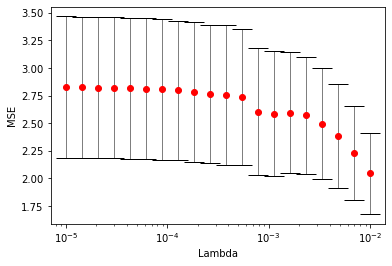

In [24]:
#Now we determine the mean and variance per alpha
import matplotlib.pyplot as plt

def create_mean_std(results):
    means = list()
    varsa = list()
    for result in results:
        means.append(np.mean(result))
        varsa.append(np.std(result))
    return means, varsa

result_list = [results_a1, results_a2, results_a3, results_a4, results_a5, results_a6, results_a7, results_a8, results_a9, results_a10,
              results_a11, results_a12, results_a13, results_a14, results_a15, results_a16, results_a17, results_a18, results_a19, results_a20]
means, varsa= create_mean_std(result_list)


plt.errorbar(alphas, means, yerr=[varsa, varsa], fmt='ro', ecolor='k', capsize=10, elinewidth=0.5)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.show()

***Answer***: the variance decreases when lambda increases. This means that the model with the least nonzero coefficients performs the best based on the mean squared error. We expect this to a certain extend, however with the most optimal lambda the percentage of nonzero coefficients is really low, which we did not expect.

## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>

The expression of the objective function is

$$ L_{enet}(\hat{\beta})= \frac{\sum_{i=1}^{n}(y_i -X_i \hat{\beta})^2}{2n} + \lambda \bigg(\frac{1-\alpha}{2}\sum_{j=1}^{m} \hat{\beta}_j^2 + \alpha \sum_{j=1}^{m} |\hat{\beta}_j|\bigg)$$

with $$\frac{\sum_{i=1}^{n}(y_i -X_i \hat{\beta})^2}{2n}= RSS$$.

From which follows $$\hat{\beta}^{elasticnet} = \text{argmin} \bigg(RSS+\lambda \sum_{j=1}^{p} (\alpha \beta_j^2 + (1-\alpha) |\beta_j|)\bigg)$$.